<a href="https://colab.research.google.com/github/pratham1412mj/Deep-learning/blob/master/fashion_mnist_NN_withoutCallback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels) , (test_images, test_labels) = mnist.load_data()

0
[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85 

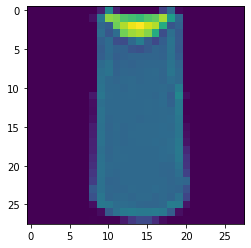

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[2])
print(training_labels[2])
print(training_images[2])

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [0]:
callbacks = myCallback()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs = 10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59712/60000 [============================>.] - ETA: 0s - loss: 0.4739 - acc: 0.8307
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4736 - acc: 0.8308


In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.4050 - acc: 0.8524


[0.40499073696136473, 0.8524]